
## Overview

This notebook will show you how to create and query a table or DataFrame that you uploaded to DBFS. [DBFS](https://docs.databricks.com/user-guide/dbfs-databricks-file-system.html) is a Databricks File System that allows you to store data for querying inside of Databricks. This notebook assumes that you have a file already inside of DBFS that you would like to read from.

This notebook is written in **Python** so the default cell type is Python. However, you can use different languages by using the `%LANGUAGE` syntax. Python, Scala, SQL, and R are all supported.

In [0]:
# File location and type
file_location = "/FileStore/tables/data-1.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)
df.show()

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|12/1/2010 8:26|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|12/1/2010 8:26|     4.

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StringType
from pyspark.sql.functions import col, isnan, when, count, udf, year, month, to_date, mean
import pyspark.sql.functions as F
import seaborn as sns
import matplotlib.pyplot as plt

# Create my_spark
spark = SparkSession.builder.getOrCreate()
print(spark)

In [0]:
df.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: string (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- Country: string (nullable = true)



In [0]:
def quick_overview(df):
   # display the spark dataframe
   print("FIRST RECORDS")
   print(df.limit(2).sort(col("InvoiceDate"), ascending=True).toPandas())

   # count null values
   print("COUNT NULL VALUES")
   print(df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c, y in df.dtypes if y in ["double", "float"]]
      ).toPandas())

   # check for dublicates
   dublicates = df.groupby(df.Description) \
    .count() \
    .where('count > 1') \
    .limit(5).toPandas()
   print("DUPLICATES")
   print(dublicates)

   # print schema
   print("PRINT SCHEMA")
   print(df.printSchema())

quick_overview(df)

FIRST RECORDS
  InvoiceNo StockCode                         Description Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER        6   
1    536365     71053                 WHITE METAL LANTERN        6   

      InvoiceDate UnitPrice CustomerID         Country  
0  12/1/2010 8:26      2.55      17850  United Kingdom  
1  12/1/2010 8:26      3.39      17850  United Kingdom  
COUNT NULL VALUES
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[541909 rows x 0 columns]
DUPLICATES
                          Description  count
0              10 COLOUR SPACEBOY PEN    327
1  SET/10 BLUE POLKADOT PAR

In [0]:
unique_desc.show()

+--------------------+
|         Description|
+--------------------+
|ASSORTED COLOUR B...|
|FELTCRAFT PRINCES...|
| WHITE METAL LANTERN|
|CREAM CUPID HEART...|
|GLASS STAR FROSTE...|
|HAND WARMER UNION...|
|BOX OF VINTAGE JI...|
|POPPY'S PLAYHOUSE...|
|RED WOOLLY HOTTIE...|
|POPPY'S PLAYHOUSE...|
|HOME BUILDING BLO...|
|RECIPE BOX WITH M...|
|HAND WARMER RED P...|
|BOX OF 6 ASSORTED...|
|LOVE BUILDING BLO...|
|IVORY KNITTED MUG...|
|BOX OF VINTAGE AL...|
|WHITE HANGING HEA...|
| DOORMAT NEW ENGLAND|
|KNITTED UNION FLA...|
+--------------------+
only showing top 20 rows



In [0]:
data_sample = df.toPandas().loc[:50,]

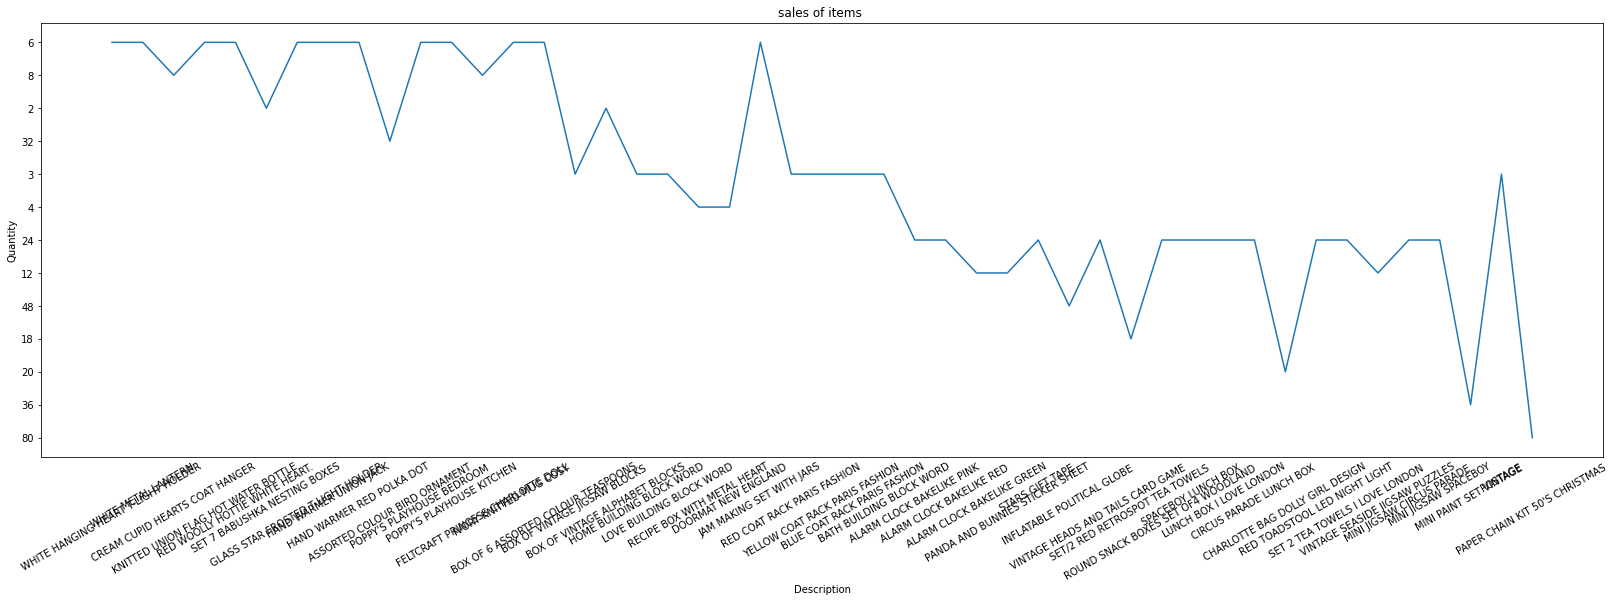

In [0]:
fig, ax = plt.subplots(figsize=(28,8))
sns.lineplot(y="Quantity", x="Description", data=data_sample, palette="Spectral_r")

# plot formatting 
ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)

# title formatting

ax.set_title("sales of items ")
plt.xlabel("Description")
plt.show()

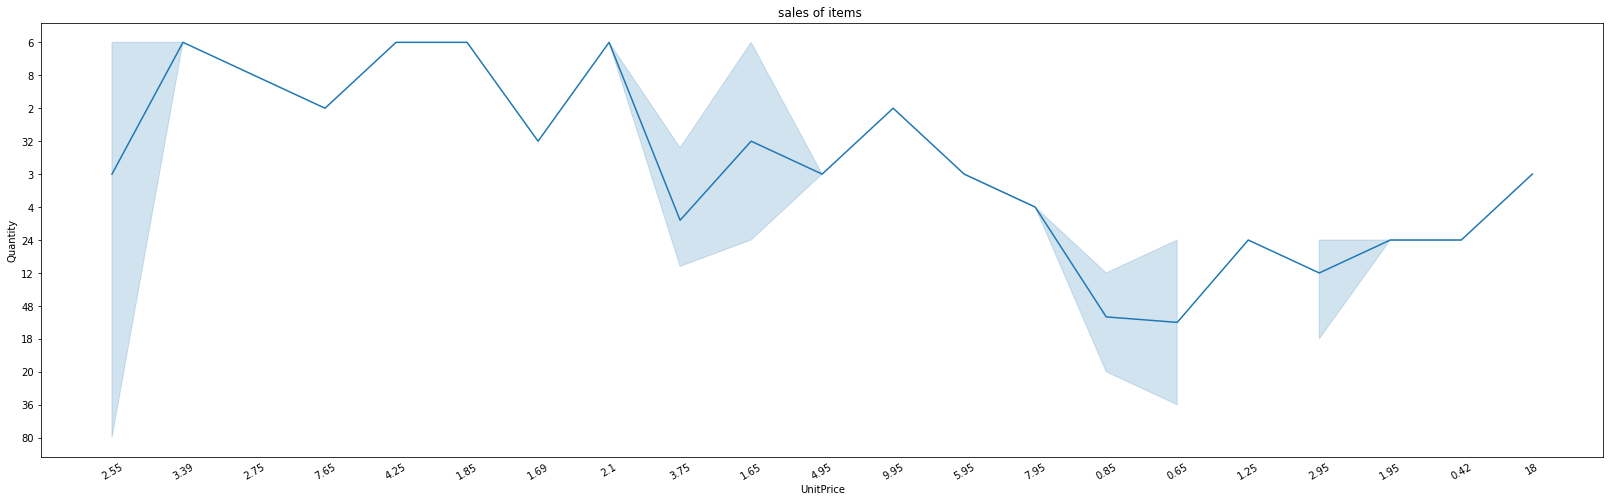

In [0]:
fig, ax = plt.subplots(figsize=(28,8))
sns.lineplot(y="Quantity", x="UnitPrice", data=data_sample, palette="Spectral_r")

# plot formatting 
ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)

# title formatting

ax.set_title("sales of items ")
plt.xlabel("UnitPrice")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Out[32]: Text(0.5, 1.0, 'between Qunatity and Unit Price')

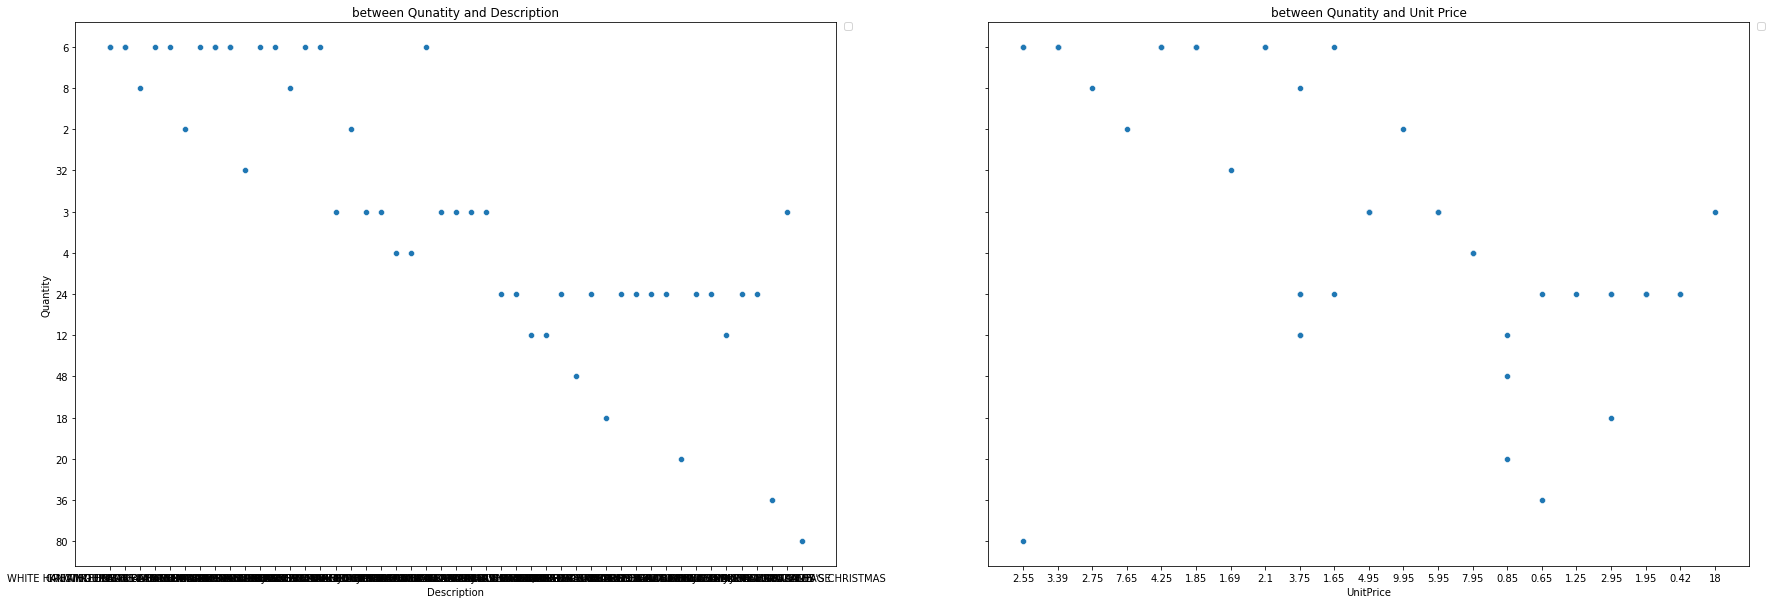

In [0]:
fig, axes= plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(30, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.2)

palette = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
sns.scatterplot(ax = axes[0],  y="Quantity", x="Description", data=data_sample, alpha=1.0, palette=palette)
axes[0].legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
axes[0].set_title("between Qunatity and Description")

sns.scatterplot(ax = axes[1],  y="Quantity", x="UnitPrice", data=data_sample, alpha=1.0, palette='rocket_r')
axes[1].legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
axes[1].set_title("between Qunatity and Unit Price")



In [0]:
display(df)

InvoiceNo StockCode Description Quantity InvoiceDate UnitPrice CustomerID Country 536365 85123A WHITE HANGING HEART T-LIGHT HOLDER 6 12/1/2010 8:26 2.55 17850 United Kingdom 536365 71053 WHITE METAL LANTERN 6 12/1/2010 8:26 3.39 17850 United Kingdom 536365 84406B CREAM CUPID HEARTS COAT HANGER 8 12/1/2010 8:26 2.75 17850 United Kingdom 536365 84029G KNITTED UNION FLAG HOT WATER BOTTLE 6 12/1/2010 8:26 3.39 17850 United Kingdom 536365 84029E RED WOOLLY HOTTIE WHITE HEART. 6 12/1/2010 8:26 3.39 17850 United Kingdom 536365 22752 SET 7 BABUSHKA NESTING BOXES 2 12/1/2010 8:26 7.65 17850 United Kingdom 536365 21730 GLASS STAR FROSTED T-LIGHT HOLDER 6 12/1/2010 8:26 4.25 17850 United Kingdom 536366 22633 HAND WARMER UNION JACK 6 12/1/2010 8:28 1.85 17850 United Kingdom 536366 22632 HAND WARMER RED POLKA DOT 6 12/1/2010 8:28 1.85 17850 United Kingdom 536367 84879 ASSORTED COLOUR BIRD ORNAMENT 32 12/1/2010 8:34 1.69 13047 United Kingdom 536367 22745 POPPY'S PLAYHOUSE BEDROOM 6 12/1/2010 8:34 2.1 13047 United Kingdom 536367 22748 POPPY'S PLAYHOUSE KITCHEN 6 12/1/2010 8:34 2.1 13047 United Kingdom 536367 22749 FELTCRAFT PRINCESS CHARLOTTE DOLL 8 12/1/2010 8:34 3.75 13047 United Kingdom 536367 22310 IVORY KNITTED MUG COSY 6 12/1/2010 8:34 1.65 13047 United Kingdom 536367 84969 BOX OF 6 ASSORTED COLOUR TEASPOONS 6 12/1/2010 8:34 4.25 13047 United Kingdom 536367 22623 BOX OF VINTAGE JIGSAW BLOCKS 3 12/1/2010 8:34 4.95 13047 United Kingdom 536367 22622 BOX OF VINTAGE ALPHABET BLOCKS 2 12/1/2010 8:34 9.95 13047 United Kingdom 536367 21754 HOME BUILDING BLOCK WORD 3 12/1/2010 8:34 5.95 13047 United Kingdom 536367 21755 LOVE BUILDING BLOCK WORD 3 12/1/2010 8:34 5.95 13047 United Kingdom 536367 21777 RECIPE BOX WITH METAL HEART 4 12/1/2010 8:34 7.95 13047 United Kingdom 536367 48187 DOORMAT NEW ENGLAND 4 12/1/2010 8:34 7.95 13047 United Kingdom 536368 22960 JAM MAKING SET WITH JARS 6 12/1/2010 8:34 4.25 13047 United Kingdom 536368 22913 RED COAT RACK PARIS FASHION 3 12/1/2010 8:34 4.95 13047 United Kingdom 536368 22912 YELLOW COAT RACK PARIS FASHION 3 12/1/2010 8:34 4.95 13047 United Kingdom 536368 22914 BLUE COAT RACK PARIS FASHION 3 12/1/2010 8:34 4.95 13047 United Kingdom 536369 21756 BATH BUILDING BLOCK WORD 3 12/1/2010 8:35 5.95 13047 United Kingdom 536370 22728 ALARM CLOCK BAKELIKE PINK 24 12/1/2010 8:45 3.75 12583 France 536370 22727 ALARM CLOCK BAKELIKE RED 24 12/1/2010 8:45 3.75 12583 France 536370 22726 ALARM CLOCK BAKELIKE GREEN 12 12/1/2010 8:45 3.75 12583 France 536370 21724 PANDA AND BUNNIES STICKER SHEET 12 12/1/2010 8:45 0.85 12583 France 536370 21883 STARS GIFT TAPE 24 12/1/2010 8:45 0.65 12583 France 536370 10002 INFLATABLE POLITICAL GLOBE 48 12/1/2010 8:45 0.85 12583 France 536370 21791 VINTAGE HEADS AND TAILS CARD GAME 24 12/1/2010 8:45 1.25 12583 France 536370 21035 SET/2 RED RETROSPOT TEA TOWELS 18 12/1/2010 8:45 2.95 12583 France 536370 22326 ROUND SNACK BOXES SET OF4 WOODLAND 24 12/1/2010 8:45 2.95 12583 France 536370 22629 SPACEBOY LUNCH BOX 24 12/1/2010 8:45 1.95 12583 France 536370 22659 LUNCH BOX I LOVE LONDON 24 12/1/2010 8:45 1.95 12583 France 536370 22631 CIRCUS PARADE LUNCH BOX 24 12/1/2010 8:45 1.95 12583 France 536370 22661 CHARLOTTE BAG DOLLY GIRL DESIGN 20 12/1/2010 8:45 0.85 12583 France 536370 21731 RED TOADSTOOL LED NIGHT LIGHT 24 12/1/2010 8:45 1.65 12583 France 536370 22900 SET 2 TEA TOWELS I LOVE LONDON 24 12/1/2010 8:45 2.95 12583 France 536370 21913 VINTAGE SEASIDE JIGSAW PUZZLES 12 12/1/2010 8:45 3.75 12583 France 536370 22540 MINI JIGSAW CIRCUS PARADE 24 12/1/2010 8:45 0.42 12583 France 536370 22544 MINI JIGSAW SPACEBOY 24 12/1/2010 8:45 0.42 12583 France 536370 22492 MINI PAINT SET VINTAGE 36 12/1/2010 8:45 0.65 12583 France 536370 POST POSTAGE 3 12/1/2010 8:45 18 12583 France 536371 22086 PAPER CHAIN KIT 50'S CHRISTMAS 80 12/1/2010 9:00 2.55 13748 United Kingdom 536372 22632 HAND WARMER RED POLKA DOT 6 12/1/2010 9:01 1.85 17850 United Kingdom 536372 22633 HAND WARMER UNION JACK 6 12/1/2010 9:01 1.8

In [0]:
from pyspark.sql.functions import col, sum as spark_sum

# Assuming df is your DataFrame
null_counts = df.select([spark_sum(col(column).isNull().cast("int")).alias(column) for column in df.columns])
null_counts.show()

+---------+---------+-----------+--------+-----------+---------+----------+-------+
|InvoiceNo|StockCode|Description|Quantity|InvoiceDate|UnitPrice|CustomerID|Country|
+---------+---------+-----------+--------+-----------+---------+----------+-------+
|        0|        0|       1454|       0|          0|        0|    135080|      0|
+---------+---------+-----------+--------+-----------+---------+----------+-------+



In [0]:
df_new = df.dropna()

In [0]:
df_new.show()

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|12/1/2010 8:26|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|12/1/2010 8:26|     4.

In [0]:
null_counts = df_new.select([spark_sum(col(column).isNull().cast("int")).alias(column) for column in df.columns])
null_counts.show()

+---------+---------+-----------+--------+-----------+---------+----------+-------+
|InvoiceNo|StockCode|Description|Quantity|InvoiceDate|UnitPrice|CustomerID|Country|
+---------+---------+-----------+--------+-----------+---------+----------+-------+
|        0|        0|          0|       0|          0|        0|         0|      0|
+---------+---------+-----------+--------+-----------+---------+----------+-------+

